In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uzairkhan45/breast-cancer-patients-mris")

print("Path to dataset files:", path)

In [3]:
import os
import kagglehub
import shutil



# Define the paths for the new directories
datasets_folder_path = '/content/drive/My Drive/Datasets'
breast_cancer_folder_path = os.path.join(datasets_folder_path, 'Breast Cancer Binary Classification')

# Create the directories
os.makedirs(breast_cancer_folder_path, exist_ok=True)

# Download latest version
temp_path = kagglehub.dataset_download("uzairkhan45/breast-cancer-patients-mris")

# Move the downloaded files to the 'Breast Cancer Binary Classification' folder
for filename in os.listdir(temp_path):
    shutil.move(os.path.join(temp_path, filename), os.path.join(breast_cancer_folder_path, filename))

print("Dataset files downloaded to:", breast_cancer_folder_path)


100%|██████████| 56.9M/56.9M [00:00<00:00, 78.3MB/s]

Extracting files...


Dataset files downloaded to: /content/drive/My Drive/Datasets/Breast Cancer Binary Classification


#import Libraries

In [4]:
!pip install torchviz
! pip install split-folders
! pip install torchsummary
! pip install imblearn

  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=1668fb69a76546fc2f09ea11a44c4a4eac0fd236aaba36473af7534f800c4202
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import copy
import os
import torch
from PIL import Image
from torch.utils.data import Dataset, Dataset, DataLoader, random_split ,Subset
import torchvision
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import ReduceLROnPlateau
import torch.nn as nn
from torchvision import utils
from torchvision.datasets import ImageFolder
from torchsummary import summary
import splitfolders
import torch.nn.functional as F
import pathlib
from torch import optim
import torchvision.models as models
from torchviz import make_dot
from torchvision import models
from torchviz import make_dot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import random


#import dataset and create dataframe

In [6]:
import os
import pandas as pd

# Define the path to the directories
train_dir = "/content/drive/MyDrive/Datasets/Breast Cancer Binary Classification/Breast Cancer Patients MRI's/train"
test_dir = "/content/drive/MyDrive/Datasets/Breast Cancer Binary Classification/Breast Cancer Patients MRI's/validation"

# Function to create a DataFrame with image paths and labels
def create_dataframe(directory):
    data = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        if os.path.isdir(label_dir):  # Check if it's a directory
            for file in os.listdir(label_dir):
                if file.endswith(('.png', '.jpg', '.jpeg')):  # Include image file types
                    data.append({'file_path': os.path.join(label_dir, file), 'label': label})
    return pd.DataFrame(data)

# Create DataFrames for train and test datasets
train_df = create_dataframe(train_dir)
test_df = create_dataframe(test_dir)

# Print out the first few rows of the DataFrames
print("Train DataFrame:")
print(train_df.head())
print("\nTest DataFrame:")
print(test_df.head())


Train DataFrame:
                                           file_path label
0  /content/drive/MyDrive/Datasets/Breast Cancer ...  Sick
1  /content/drive/MyDrive/Datasets/Breast Cancer ...  Sick
2  /content/drive/MyDrive/Datasets/Breast Cancer ...  Sick
3  /content/drive/MyDrive/Datasets/Breast Cancer ...  Sick
4  /content/drive/MyDrive/Datasets/Breast Cancer ...  Sick

Test DataFrame:
                                           file_path    label
0  /content/drive/MyDrive/Datasets/Breast Cancer ...  Healthy
1  /content/drive/MyDrive/Datasets/Breast Cancer ...  Healthy
2  /content/drive/MyDrive/Datasets/Breast Cancer ...  Healthy
3  /content/drive/MyDrive/Datasets/Breast Cancer ...  Healthy
4  /content/drive/MyDrive/Datasets/Breast Cancer ...  Healthy


In [7]:
train_df.shape

(1400, 2)

In [8]:
test_df.shape

(80, 2)

In [9]:
train_df.describe()

,file_path,label
count,1400,1400
unique,1400,2
top,/content/drive/MyDrive/Datasets/Breast Cancer ...,Sick
freq,1,700


In [10]:
test_df.describe()

,file_path,label
count,80,80
unique,80,2
top,/content/drive/MyDrive/Datasets/Breast Cancer ...,Healthy
freq,1,40


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  1400 non-null   object
 1   label      1400 non-null   object
dtypes: object(2)
memory usage: 22.0+ KB


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_path  80 non-null     object
 1   label      80 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


In [13]:
train_df_label_counts = train_df['label'].value_counts()
test_df_label_counts = test_df['label'].value_counts()

In [14]:
print(f'Train label counts:\n{train_df_label_counts}')
print(f'\nTest label counts:\n{test_df_label_counts}')

Train label counts:
label
Sick       700
Healthy    700
Name: count, dtype: int64

Test label counts:
label
Healthy    40
Sick       40
Name: count, dtype: int64


In [15]:
train_df.isnull().sum()

,0
file_path,0
label,0


In [16]:
test_df.isnull().sum()

,0
file_path,0
label,0


In [17]:
print(f'how many duplicated row in train data? : {train_df.duplicated().sum()}')
print(f'how many duplicated row in test data? : {test_df.duplicated().sum()}')

how many duplicated row in train data? : 0
how many duplicated row in test data? : 0


In [18]:
train_df['label'].unique()

array(['Sick', 'Healthy'], dtype=object)

In [19]:
train_df_copy = copy.deepcopy(train_df)
test_df_copy = copy.deepcopy(test_df)

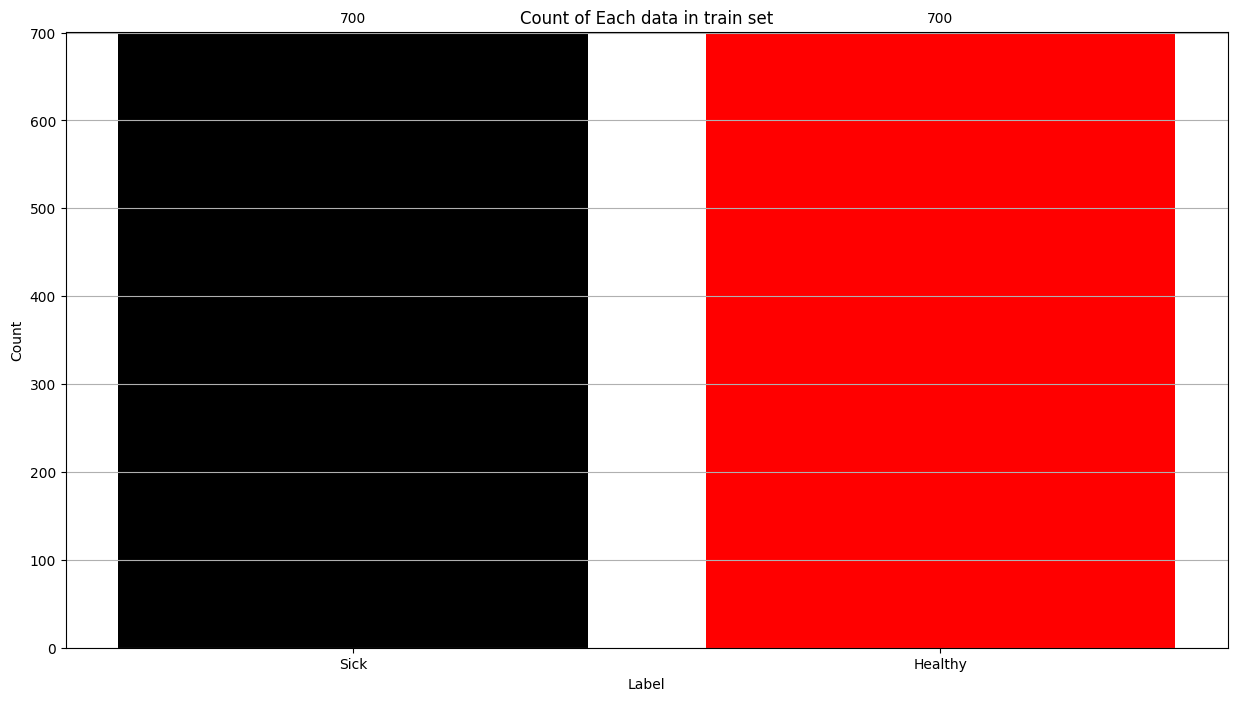

In [20]:
# Define a color for each label
colors = {
    'Healthy': 'red',
    'Sick': 'black'
}

# Create the plot
plt.figure(figsize=(15, 8))
bars = plt.bar(train_df_label_counts.index, train_df_label_counts.values, color=[colors[label] for label in train_df_label_counts.index])

# Set y-axis limit
plt.ylim(0, train_df_label_counts.max() + 1)

# Annotate bars with their heights
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # Offset text slightly above the bar
                 textcoords='offset points',
                 ha='center',
                 va='bottom')

# Show the plot
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Each data in train set')
plt.grid(axis='y')
plt.show()


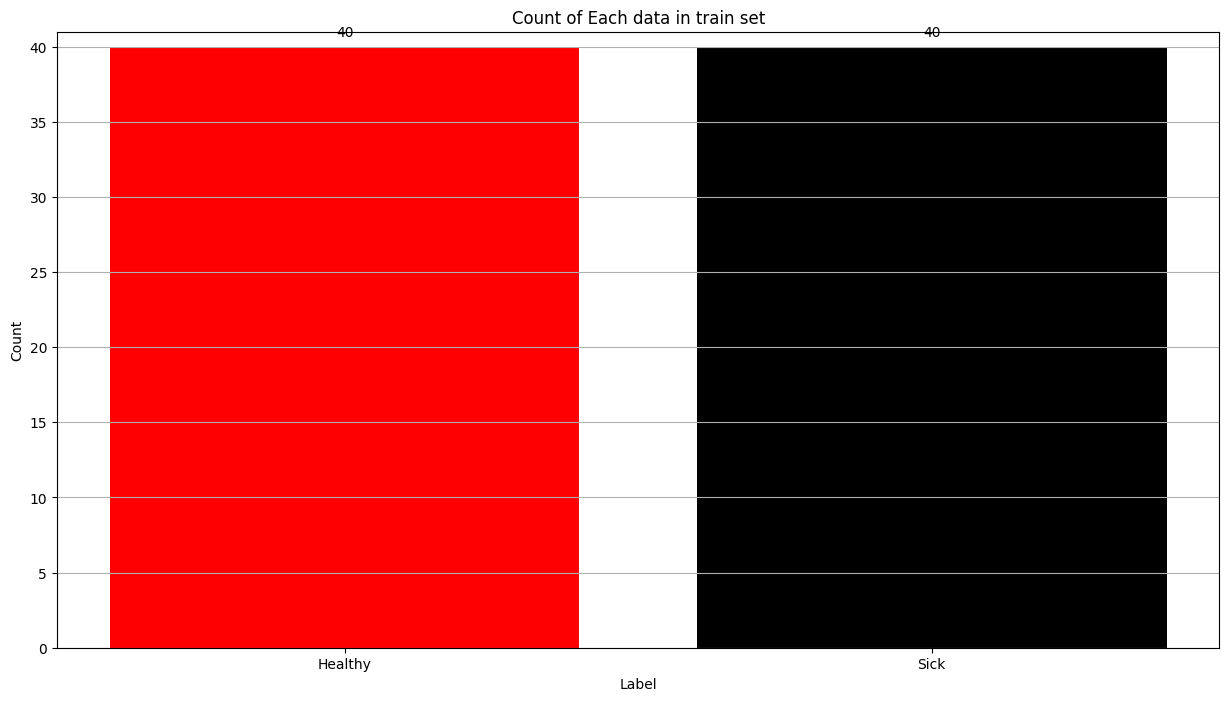

In [21]:
# Define a color for each label
colors = {
    'Healthy': 'red',
    'Sick': 'black'
}

# Create the plot
plt.figure(figsize=(15, 8))
bars = plt.bar(test_df_label_counts.index, test_df_label_counts.values, color=[colors[label] for label in test_df_label_counts.index])

# Set y-axis limit
plt.ylim(0, test_df_label_counts.max() + 1)

# Annotate bars with their heights
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # Offset text slightly above the bar
                 textcoords='offset points',
                 ha='center',
                 va='bottom')

# Show the plot
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Count of Each data in train set')
plt.grid(axis='y')
plt.show()


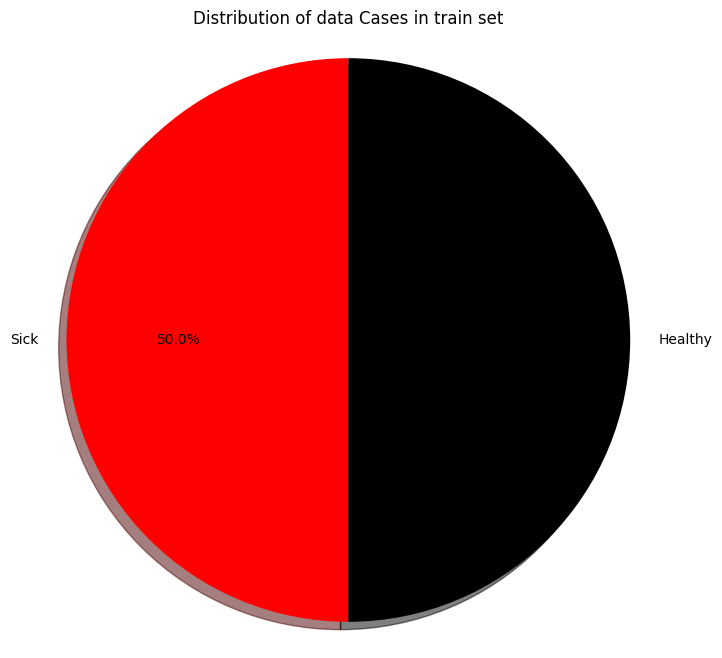

In [22]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(train_df_label_counts,
        labels=train_df_label_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['red', 'black'],  # Specify colors for each label
        shadow=True)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Distribution of data Cases in train set')
plt.show()


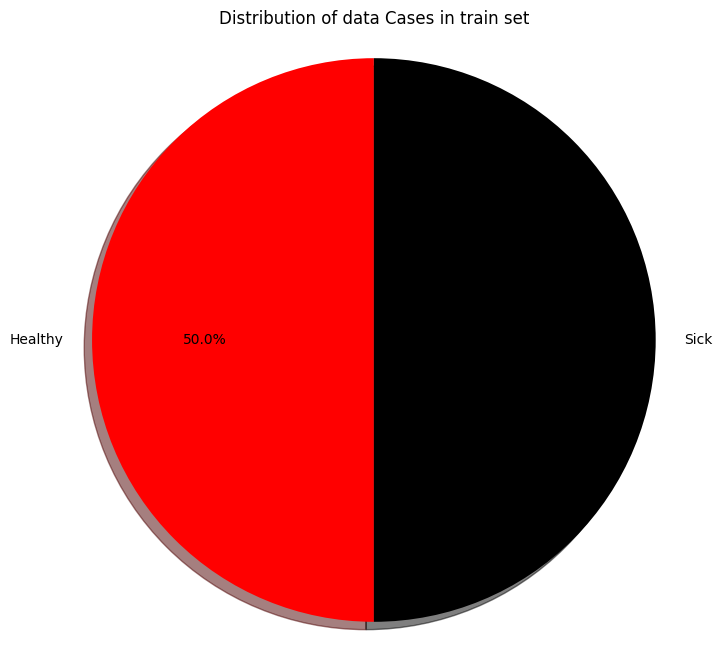

In [23]:
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(test_df_label_counts,
        labels=test_df_label_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        colors=['red', 'black'],  # Specify colors for each label
        shadow=True)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.title('Distribution of data Cases in train set')
plt.show()


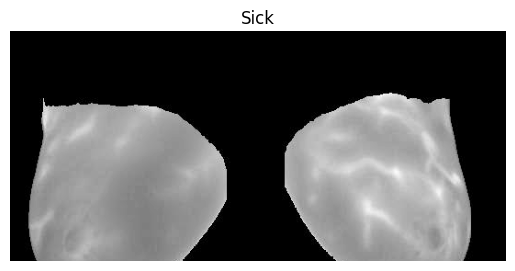

In [24]:
import matplotlib.pyplot as plt


# Assuming 'file_path' column contains image file paths
img_path = train_df['file_path'][331]
label = train_df['label'][331]

# Load the image using PIL
img = Image.open(img_path)

# Convert the image to a NumPy array
img_array = np.array(img)

plt.imshow(img_array, cmap='gray')
plt.title(label)
plt.axis('off')
plt.show()

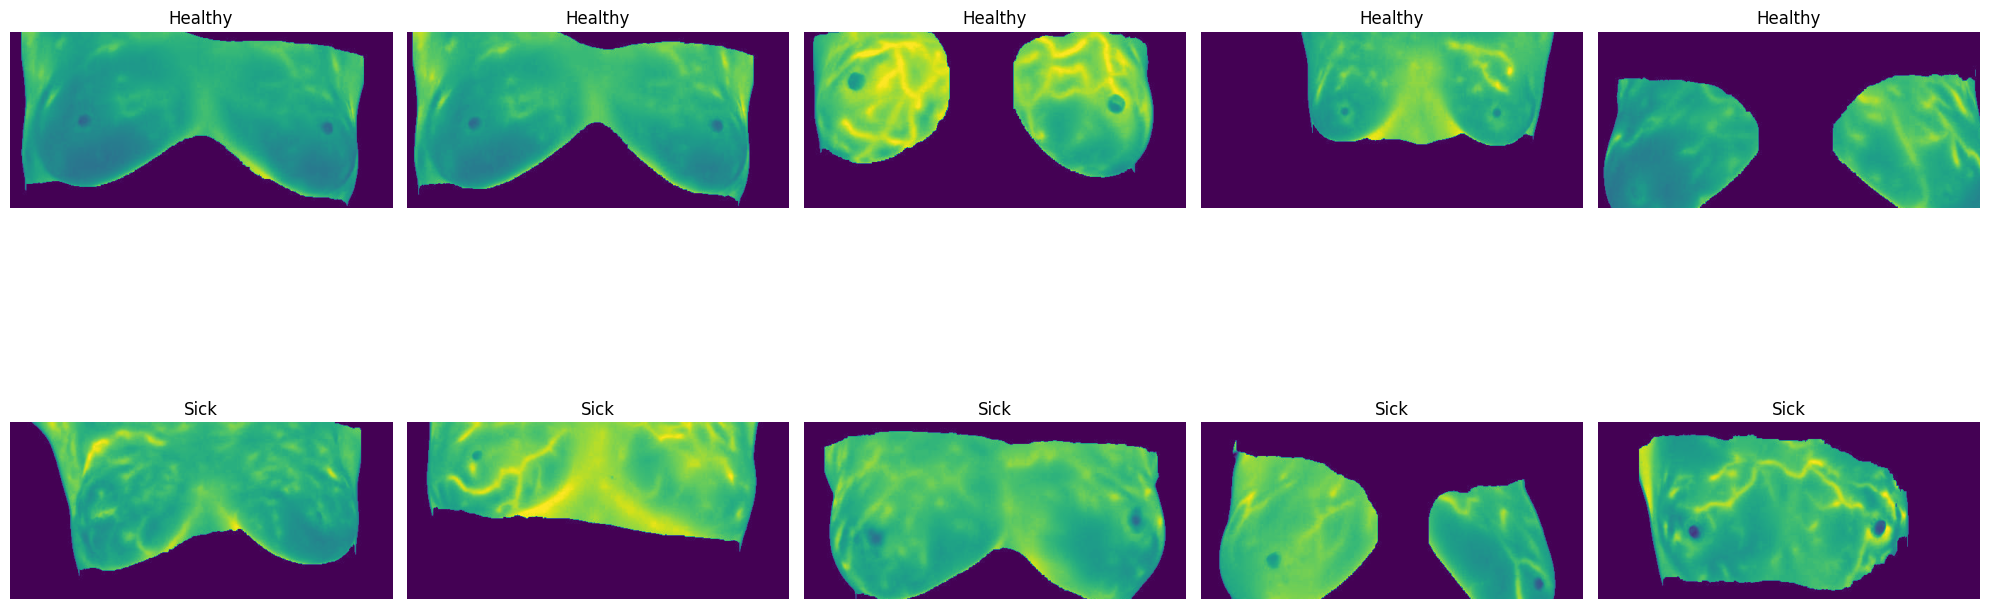

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io  # Assuming you're using skimage for image loading

# Separate images by class
healthy_images = train_df[train_df['label'] == 'Healthy']['file_path'].values
sick_images = train_df[train_df['label'] == 'Sick']['file_path'].values

# Ensure sample size doesn't exceed class size
healthy_sample_size = min(5, len(healthy_images))
sick_sample_size = min(5, len(sick_images))

# Randomly sample images with replacement (if necessary)
healthy_sample = np.random.choice(healthy_images, healthy_sample_size, replace=True)
sick_sample = np.random.choice(sick_images, sick_sample_size, replace=True)

# Create subplots
num_rows = 2  # Adjust based on sample size if needed
num_cols = 5
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 10))  # Adjust figure size as needed

# Display images
row_counter = 0
for sample, label in zip([healthy_sample, sick_sample], ['Healthy', 'Sick']):
    for ax, img_path in zip(axes[row_counter], sample):
        img = io.imread(img_path)
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(label)
    row_counter += 1  # Move to the next row of subplots

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [26]:
import warnings
warnings.filterwarnings("ignore")

In [27]:
# Define transformations for the dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.RandomHorizontalFlip(p=0.5),  # Randomly flip images horizontally
    transforms.RandomVerticalFlip(p=0.5),  # Randomly flip images vertically
    transforms.RandomRotation(degrees=30),  # Randomly rotate images
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Randomly change brightness, contrast, etc.
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
])

# Custom dataset class
class CustomDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform
        self.classes = dataframe['label'].unique()  # Store unique class names
        self.label_encoder = LabelEncoder()
        self.label_encoder.fit(self.classes)  # Fit the label encoder

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]  # Get image path
        label = self.dataframe.iloc[idx, 1]  # Get label

        # Check if the path is a file
        if not os.path.isfile(img_path):
            raise FileNotFoundError(f"Image file not found: {img_path}")

        img = Image.open(img_path).convert('RGB')  # Open image and convert to RGB

        if self.transform:
            img = self.transform(img)  # Apply transformations

        # Convert label to integer and then to tensor
        label = self.label_encoder.transform([label])[0]  # Transform the label to an integer
        label = torch.tensor(label, dtype=torch.long)  # Convert to tensor

        return img, label

# Create the dataset from the resampled training DataFrame
train_dataset = CustomDataset(train_df, transform=transform)

test_dataset = CustomDataset(test_df, transform=transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize images
]))  # Limited transformations for test set


# Get indices for splitting and labels for stratification
indices = list(range(len(train_df)))
train_labels = train_df['label'].values  # Extract labels for stratification

# Split into training and validation sets
train_indices, val_indices = train_test_split(indices, test_size=0.15, random_state=42, stratify=train_labels)

# Create training and validation subsets
train_subset = Subset(train_dataset, train_indices)
val_subset = Subset(train_dataset, val_indices)  # Create validation subset from the original train dataset

# Create data loaders for each dataset
train_loader = DataLoader(train_subset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_subset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

# Optional: Print the sizes of the datasets
print(f"Training dataset size: {len(train_loader.dataset)}")
print(f"Validation dataset size: {len(val_loader.dataset)}")
print(f"Test dataset size: {len(test_loader.dataset)}")


Training dataset size: 1190
Validation dataset size: 210
Test dataset size: 80


#Create CNN model

In [69]:
class CNNmodel1(nn.Module):
    def __init__(self):
        super(CNNmodel1, self).__init__()

        # Convolutional layers with increased kernel size
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  # Batch normalization after conv1

        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  # Batch normalization after conv2

        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(64)  # Batch normalization after conv3

        self.conv4 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(128)  # Batch normalization after conv4

        self.conv5 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn5 = nn.BatchNorm2d(256)  # Batch normalization after conv5

        self.conv6 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.bn6 = nn.BatchNorm2d(512)  # Batch normalization after conv5

        # Max pooling layers
        self.maxpool = nn.MaxPool2d(kernel_size=2)

        # Dropout layer
        self.dropout = nn.Dropout(p=0.5)

        # Activation Function
        self.leakyRelu = nn.LeakyReLU()

        # Fully connected layers
        self.fc1 = nn.Linear(512 * 3 * 3, 1024)  # Adjusted input size based on the output of conv layers
        self.fc2 = nn.Linear(1024, 512)
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 1)

    def forward(self, x):
        # Convolutional layers with max pooling, batch normalization, and dropout
        x = self.leakyRelu(self.bn1(self.conv1(x)))
        x = self.maxpool(x)

        x = self.leakyRelu(self.bn2(self.conv2(x)))
        x = self.maxpool(x)

        x = self.leakyRelu(self.bn3(self.conv3(x)))
        x = self.maxpool(x)

        x = self.leakyRelu(self.bn4(self.conv4(x)))
        x = self.maxpool(x)

        x = self.leakyRelu(self.bn5(self.conv5(x)))
        x = self.maxpool(x)

        x = self.leakyRelu(self.bn6(self.conv6(x)))
        x = self.maxpool(x)


        # Flatten
        out = x.view(x.size(0), -1)

        # Fully connected layers with dropout
        out = self.leakyRelu(self.fc1(out))
        out = self.dropout(out)  # Apply dropout
        out = self.leakyRelu(self.fc2(out))
        out = self.dropout(out)  # Apply dropout
        out = self.leakyRelu(self.fc3(out))
        out = self.fc4(out)


        return out


In [70]:
import torch.nn as nn

class CNNModel2(nn.Module):
    def __init__(self):
        super(CNNModel2, self).__init__()

        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32, 32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.25),

        )

        self.fc_layers = nn.Sequential(
            nn.Linear(100352 , 64),
            nn.ReLU(),
            nn.Dropout(p=0.25),
            nn.Linear(64, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)
        x = self.fc_layers(x)
        return x

In [71]:
Model1 = CNNmodel1()
Model1

CNNmodel1(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv6): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn6): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_runnin

In [72]:
Model2 = CNNModel2()
Model2

CNNModel2(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU()
    (10): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU()
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=

In [73]:
import torch

# Check if CUDA is available
if torch.cuda.is_available():
    print("CUDA is available!")
    # Get the current device
    current_device = torch.cuda.current_device()
    print(f"Current CUDA device: {current_device}")

    # Get the number of GPUs
    num_gpus = torch.cuda.device_count()
    print(f"Number of available GPUs: {num_gpus}")

    # Get the name of the GPU
    for i in range(num_gpus):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
else:
    print("CUDA is not available.")


CUDA is not available.


In [74]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
Model1.to(device)

# Create a dummy input tensor on the same device
input_tensor = torch.randn(1, 3, 224, 224).to(device)

# Print model summary
summary(Model1, (3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 16, 224, 224]             448
       BatchNorm2d-2         [-1, 16, 224, 224]              32
         LeakyReLU-3         [-1, 16, 224, 224]               0
         MaxPool2d-4         [-1, 16, 112, 112]               0
            Conv2d-5         [-1, 32, 112, 112]           4,640
       BatchNorm2d-6         [-1, 32, 112, 112]              64
         LeakyReLU-7         [-1, 32, 112, 112]               0
         MaxPool2d-8           [-1, 32, 56, 56]               0
            Conv2d-9           [-1, 64, 56, 56]          18,496
      BatchNorm2d-10           [-1, 64, 56, 56]             128
        LeakyReLU-11           [-1, 64, 56, 56]               0
        MaxPool2d-12           [-1, 64, 28, 28]               0
           Conv2d-13          [-1, 128, 28, 28]          73,856
      BatchNorm2d-14          [-1, 128,

In [75]:
# Set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Move model to the appropriate device
Model2.to(device)

# Create a dummy input tensor on the same device
input_tensor = torch.randn(1, 3, 224, 224).to(device)

# Print model summary
summary(Model2, (3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             896
       BatchNorm2d-2         [-1, 32, 224, 224]              64
              ReLU-3         [-1, 32, 224, 224]               0
            Conv2d-4         [-1, 32, 224, 224]           9,248
       BatchNorm2d-5         [-1, 32, 224, 224]              64
              ReLU-6         [-1, 32, 224, 224]               0
         MaxPool2d-7         [-1, 32, 112, 112]               0
            Conv2d-8         [-1, 64, 112, 112]          18,496
       BatchNorm2d-9         [-1, 64, 112, 112]             128
             ReLU-10         [-1, 64, 112, 112]               0
           Conv2d-11         [-1, 64, 112, 112]          36,928
      BatchNorm2d-12         [-1, 64, 112, 112]             128
             ReLU-13         [-1, 64, 112, 112]               0
        MaxPool2d-14           [-1, 64,

#Visualize Model Arcitecture

In [76]:
# Create a dummy input
x = torch.randn(1, 3, 224, 224).to(device)  # Batch size of 1

# Get the output
y = Model1(x)

# Visualize the model
dot = make_dot(y, params=dict(list(Model1.named_parameters())))
dot.render("cnn_architecture3 for BreastCancer", format="png")  # Save as PNG


'cnn_architecture3 for BreastCancer.png'

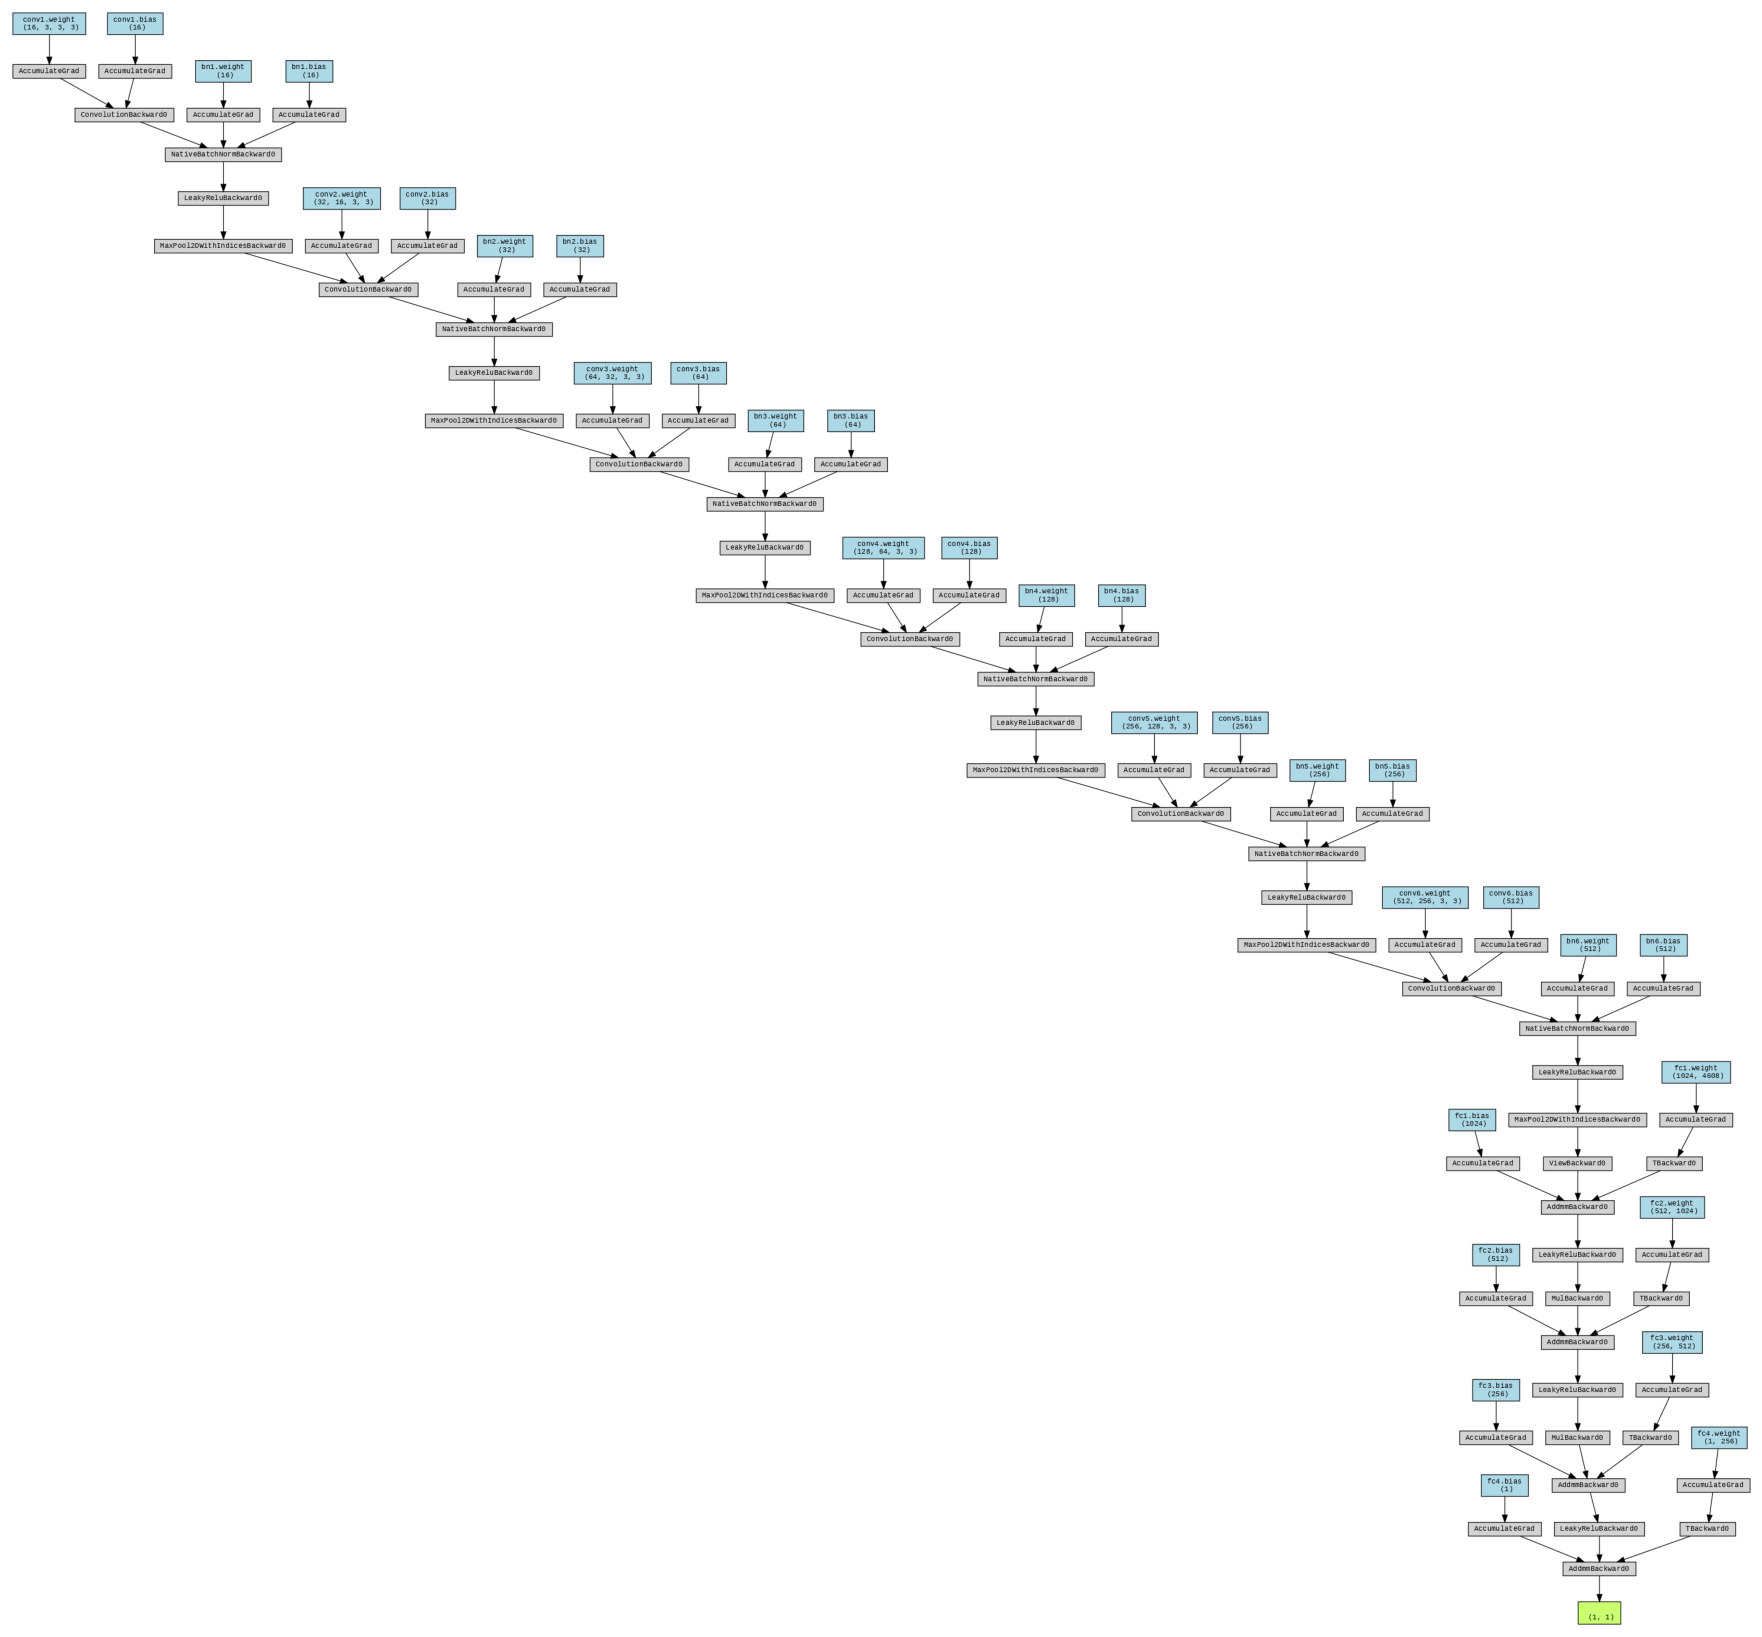

In [77]:
# Display the image using matplotlib
img = mpimg.imread("/content/cnn_architecture3 for BreastCancer.png")
plt.figure(figsize=(35, 21))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [78]:
# Create a dummy input
x = torch.randn(1, 3, 224, 224).to(device)  # Batch size of 1

# Get the output
y = Model2(x)

# Visualize the model
dot = make_dot(y, params=dict(list(Model1.named_parameters())))
dot.render("cnn_architecture4 for BreastCancer", format="png")  # Save as PNG


'cnn_architecture4 for BreastCancer.png'

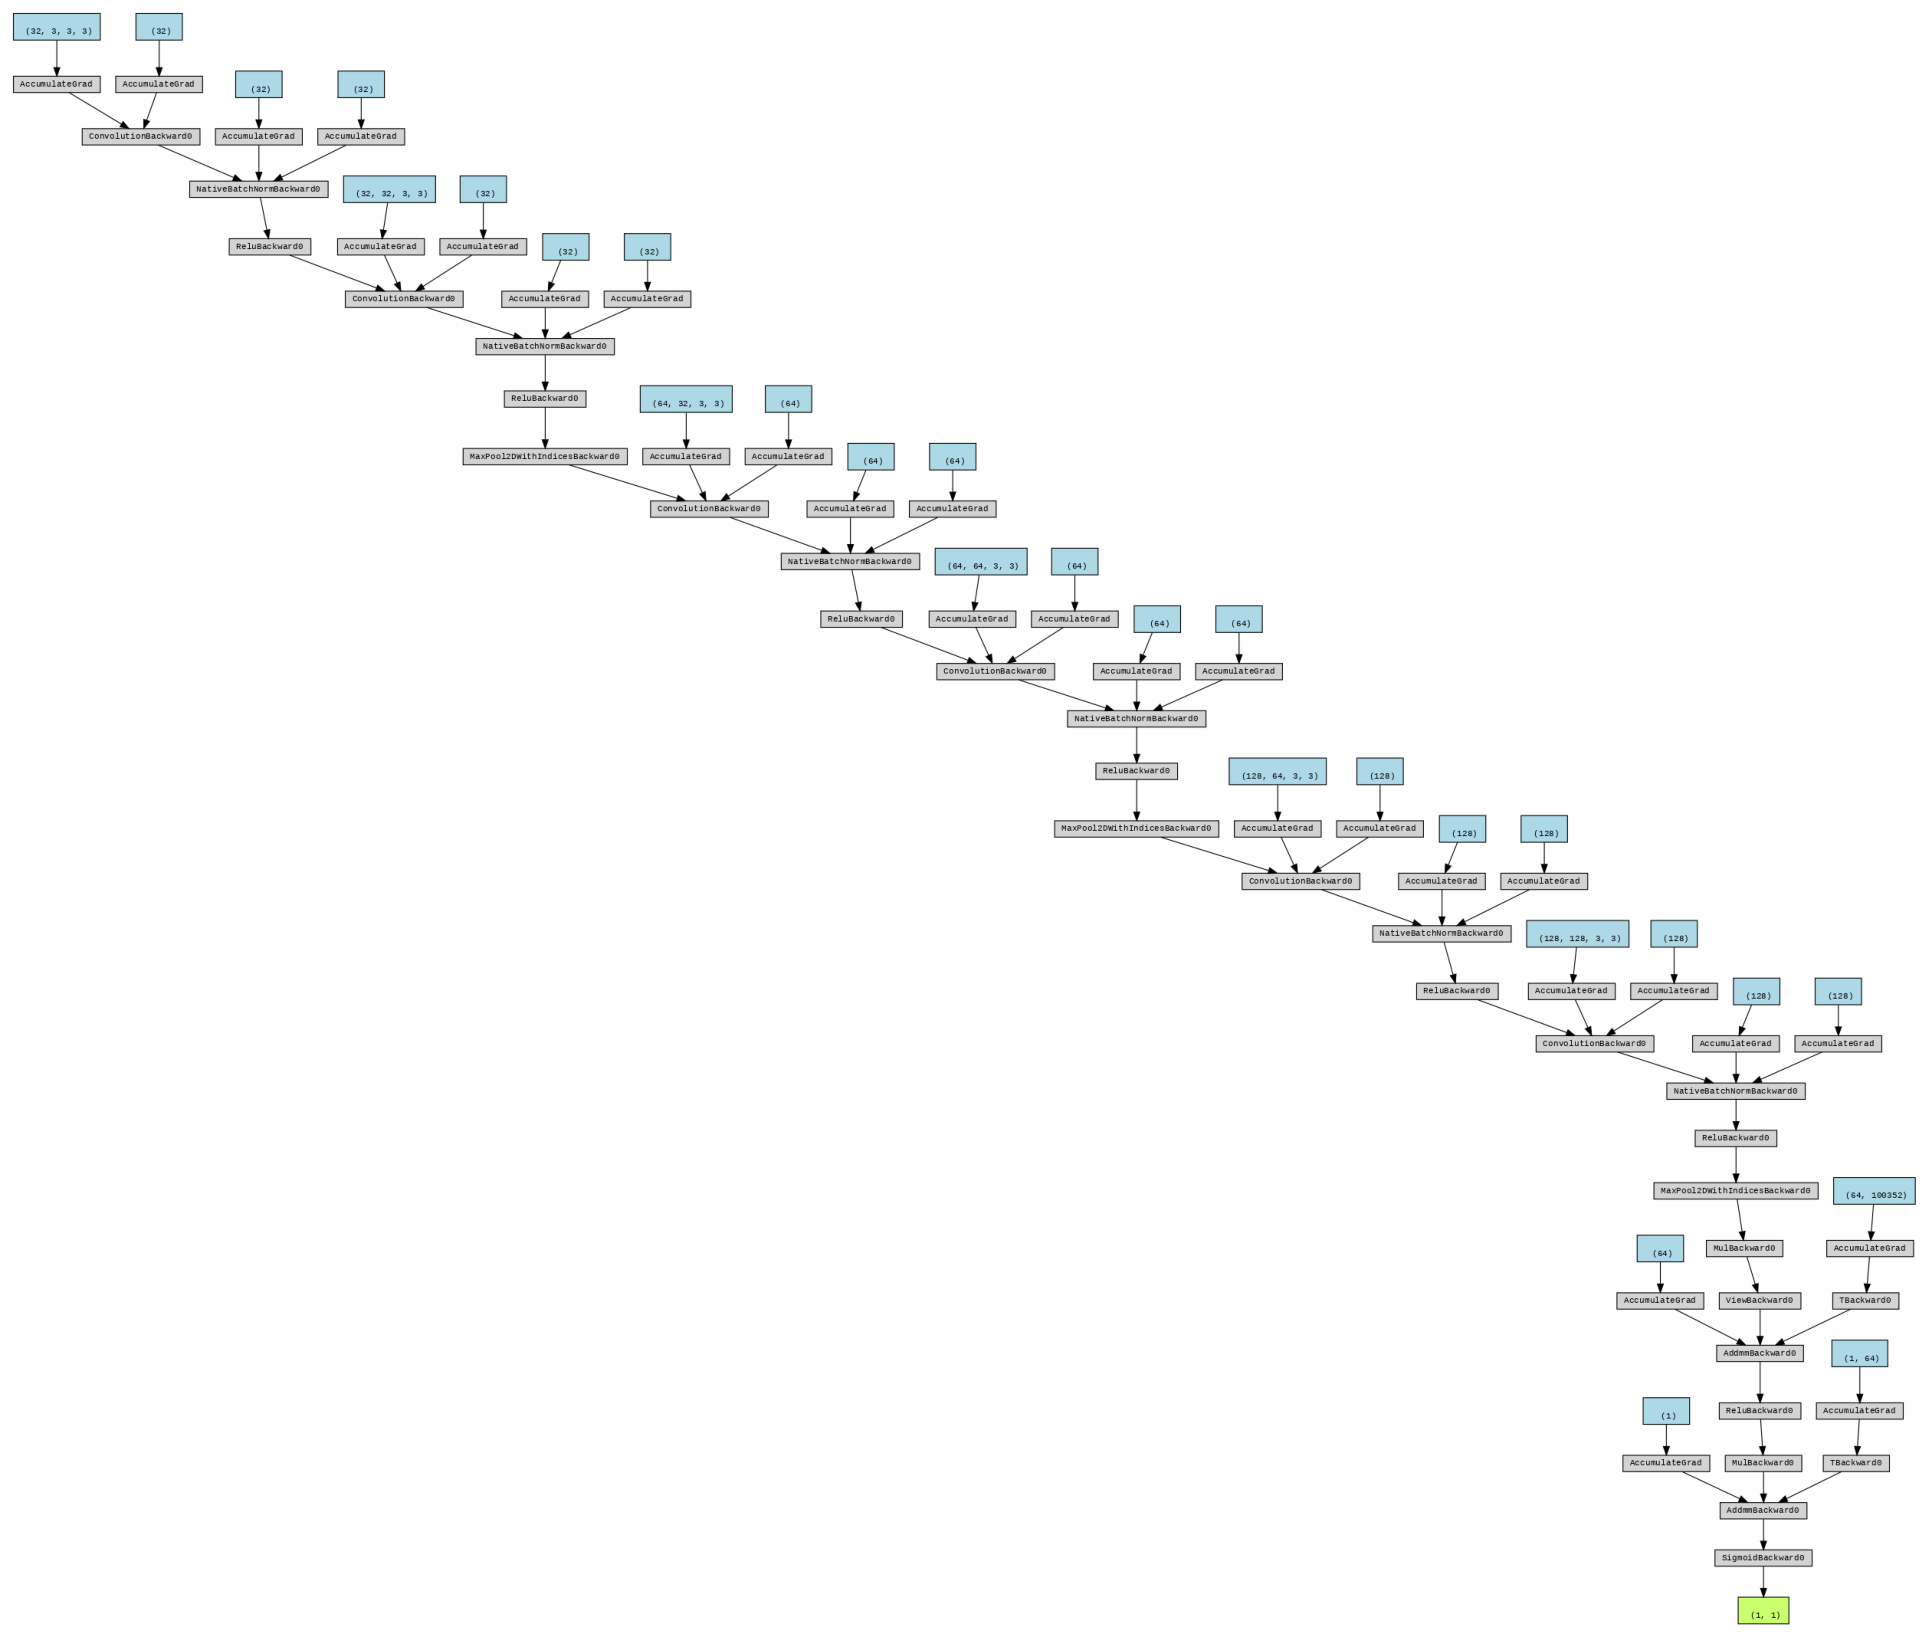

In [79]:
# Display the image using matplotlib
img = mpimg.imread("/content/cnn_architecture4 for BreastCancer.png")
plt.figure(figsize=(35, 21))
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

In [81]:
num_epoch = 25
loss_fn = nn.BCEWithLogitsLoss()
lr=0.001
optimizer = torch.optim.Adam(Model1.parameters(), lr=0.001, weight_decay=1e-4)  # L2 regularization
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5, verbose=True)

In [82]:
# Early Stopping Class
class EarlyStopping:
    def __init__(self, patience=5, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = float('inf')
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss:
            self.best_loss = val_loss
            self.counter = 0  # Reset counter if validation loss improves
        else:
            self.counter += 1  # Increment counter if no improvement
            if self.counter >= self.patience:
                self.early_stop = True
                if self.verbose:
                    print("Early stopping triggered")

# Initialize early stopping
early_stopping = EarlyStopping(patience=5, verbose=True)


In [83]:
train_loss_list=[]
val_loss_list=[]
acc_list=[]

best_val_loss = float('inf')  # Initialize the best validation loss
best_model_wts = None  # Variable to hold the best model weights

In [84]:


for epoch in range(num_epoch):
    train_loss = 0
    val_loss = 0
    total = 0
    correct = 0

    # Training phase
    Model1.train()
    for i, (images, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        images = images.to(device)
        labels = labels.to(device).unsqueeze(1).float()  # Ensure labels are float

        # Forward pass
        outputs = Model1(images)
        loss = loss_fn(outputs, labels)
        train_loss += loss.item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Validation phase
    Model2.eval()
    with torch.no_grad():
        for images, labels in val_loader:
            images = images.to(device)
            labels = labels.to(device).unsqueeze(1).float()  # Ensure labels are float

            outputs = Model1(images)
            loss = loss_fn(outputs, labels)
            val_loss += loss.item()

            # Get probabilities and predictions
            probabilities = torch.sigmoid(outputs)  # Apply sigmoid for evaluation
            predicted = (probabilities > 0.5).float()  # Thresholding at 0.5

            total += len(labels)
            correct += (predicted == labels).sum().item()

    # Step the scheduler based on validation loss
    scheduler.step(val_loss)

    # Calculate performance of training model
    accuracy = 100 * correct / float(total)
    train_loss_list.append(train_loss / len(train_loader))
    val_loss_list.append(val_loss / len(val_loader))
    acc_list.append(accuracy)

    print('-' * 100)
    print('Epoch [{}/{}], Train Loss: {:.4f}, Val Loss: {:.4f}, Accuracy: {:.2f}%'.format(
        epoch + 1, num_epoch, train_loss / len(train_loader), val_loss / len(val_loader), accuracy))

    # Check if the current validation loss is the best we've seen so far
    avg_val_loss = val_loss / len(val_loader)
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        best_model_wts = Model1.state_dict()
        print("Best model weights saved.")

    # Check for early stopping
    early_stopping(avg_val_loss)
    if early_stopping.early_stop:
        print("Early stopping at epoch:", epoch + 1)
        break

# Save the best model weights to a file
if best_model_wts is not None:
    torch.save(best_model_wts, 'best_model_weights.pth')
    print("Best model weights saved to 'best_model_weights.pth'.")

----------------------------------------------------------------------------------------------------
Epoch [1/25], Train Loss: 0.7398, Val Loss: 0.7015, Accuracy: 51.90%
Best model weights saved.
----------------------------------------------------------------------------------------------------
Epoch [2/25], Train Loss: 0.6956, Val Loss: 0.6895, Accuracy: 59.05%
Best model weights saved.
----------------------------------------------------------------------------------------------------
Epoch [3/25], Train Loss: 0.6830, Val Loss: 0.6775, Accuracy: 56.67%
Best model weights saved.
----------------------------------------------------------------------------------------------------
Epoch [4/25], Train Loss: 0.6711, Val Loss: 0.6866, Accuracy: 62.38%
----------------------------------------------------------------------------------------------------
Epoch [5/25], Train Loss: 0.6705, Val Loss: 0.6800, Accuracy: 63.33%
------------------------------------------------------------------------

In [ ]:
print(f'Number of epochs: {num_epoch}')
print(f'Train Loss List Length: {len(train_loss_list)}')
print(f'Validation Loss List Length: {len(val_loss_list)}')
print(f'Accuracy List Length: {len(acc_list)}')


In [86]:
#if early stoped trigged change that
num_epoch = 17

#Visualize model training phase

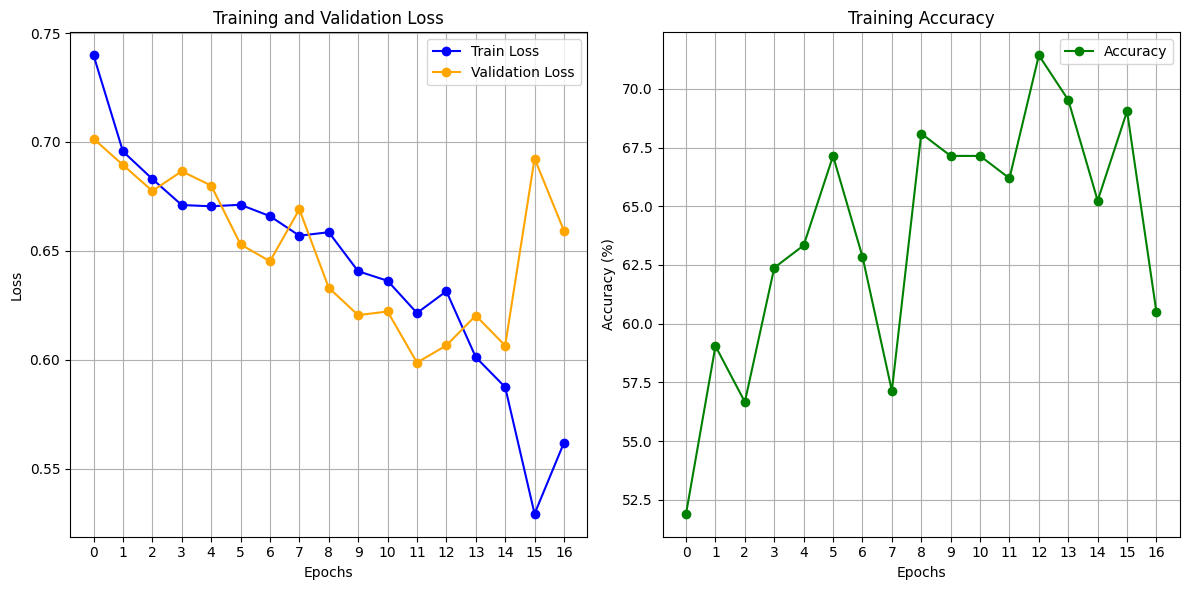

In [87]:


# Plotting training and validation loss
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.plot(range(num_epoch), train_loss_list, label='Train Loss', color='blue', marker='o')
plt.plot(range(num_epoch), val_loss_list, label='Validation Loss', color='orange', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xticks(range(num_epoch))  # Ensure all epochs are labeled
plt.grid(True)
plt.legend()
plt.tight_layout()

# Accuracy Plot
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.plot(range(num_epoch), acc_list, label='Accuracy', color='green', marker='o')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.xticks(range(num_epoch))  # Ensure all epochs are labeled
plt.grid(True)
plt.legend()
plt.tight_layout()

# Show the plots
plt.show()


#Evaluation Model

In [91]:
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

Test Loss: 0.8982, Test Accuracy: 53.75%
Precision: 0.62, Recall: 0.20, F1 Score: 0.30, ROC AUC: 0.54


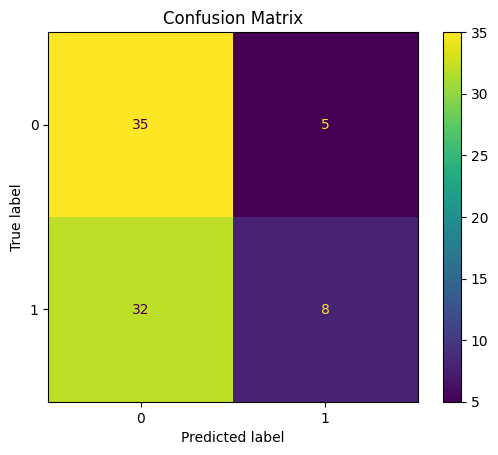

In [92]:
# Test phase
Model1.eval()  # Set model to evaluation mode

# Initialize lists to store metrics
test_loss = 0
total = 0
correct = 0
all_test_labels = []
all_test_predictions = []
test_loss_list = []  # List to store all test losses
test_accuracy_list = []  # List to store test accuracy for each epoch

# Disable gradient calculation
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device).unsqueeze(1).float()  # Ensure labels are float

        # Forward pass
        outputs = Model1(images)
        loss = loss_fn(outputs, labels)
        test_loss += loss.item()

        # Append individual loss to the list for visualization
        test_loss_list.append(loss.item())  # Store each loss

        # Collecting true and predicted labels
        probabilities = torch.sigmoid(outputs)  # Apply sigmoid for evaluation
        predicted = (probabilities > 0.5).float()  # Thresholding at 0.5
        total += len(labels)
        correct += (predicted == labels).sum().item()

        # Store labels and predictions for metrics
        all_test_labels.extend(labels.cpu().numpy())  # Collect true labels
        all_test_predictions.extend(predicted.cpu().numpy())  # Collect predicted labels

# Calculate average test loss and accuracy
test_loss_avg = test_loss / len(test_loader)
test_accuracy = 100 * correct / total

# Append the accuracy for the current epoch
test_accuracy_list.append(test_accuracy)

# Calculate additional metrics
precision = precision_score(all_test_labels, all_test_predictions)
recall = recall_score(all_test_labels, all_test_predictions)
f1 = f1_score(all_test_labels, all_test_predictions)
roc_auc = roc_auc_score(all_test_labels, all_test_predictions)

# Print test results
print(f'Test Loss: {test_loss_avg:.4f}, Test Accuracy: {test_accuracy:.2f}%')
print(f'Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}, ROC AUC: {roc_auc:.2f}')

# Confusion Matrix
cm = confusion_matrix(all_test_labels, all_test_predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()


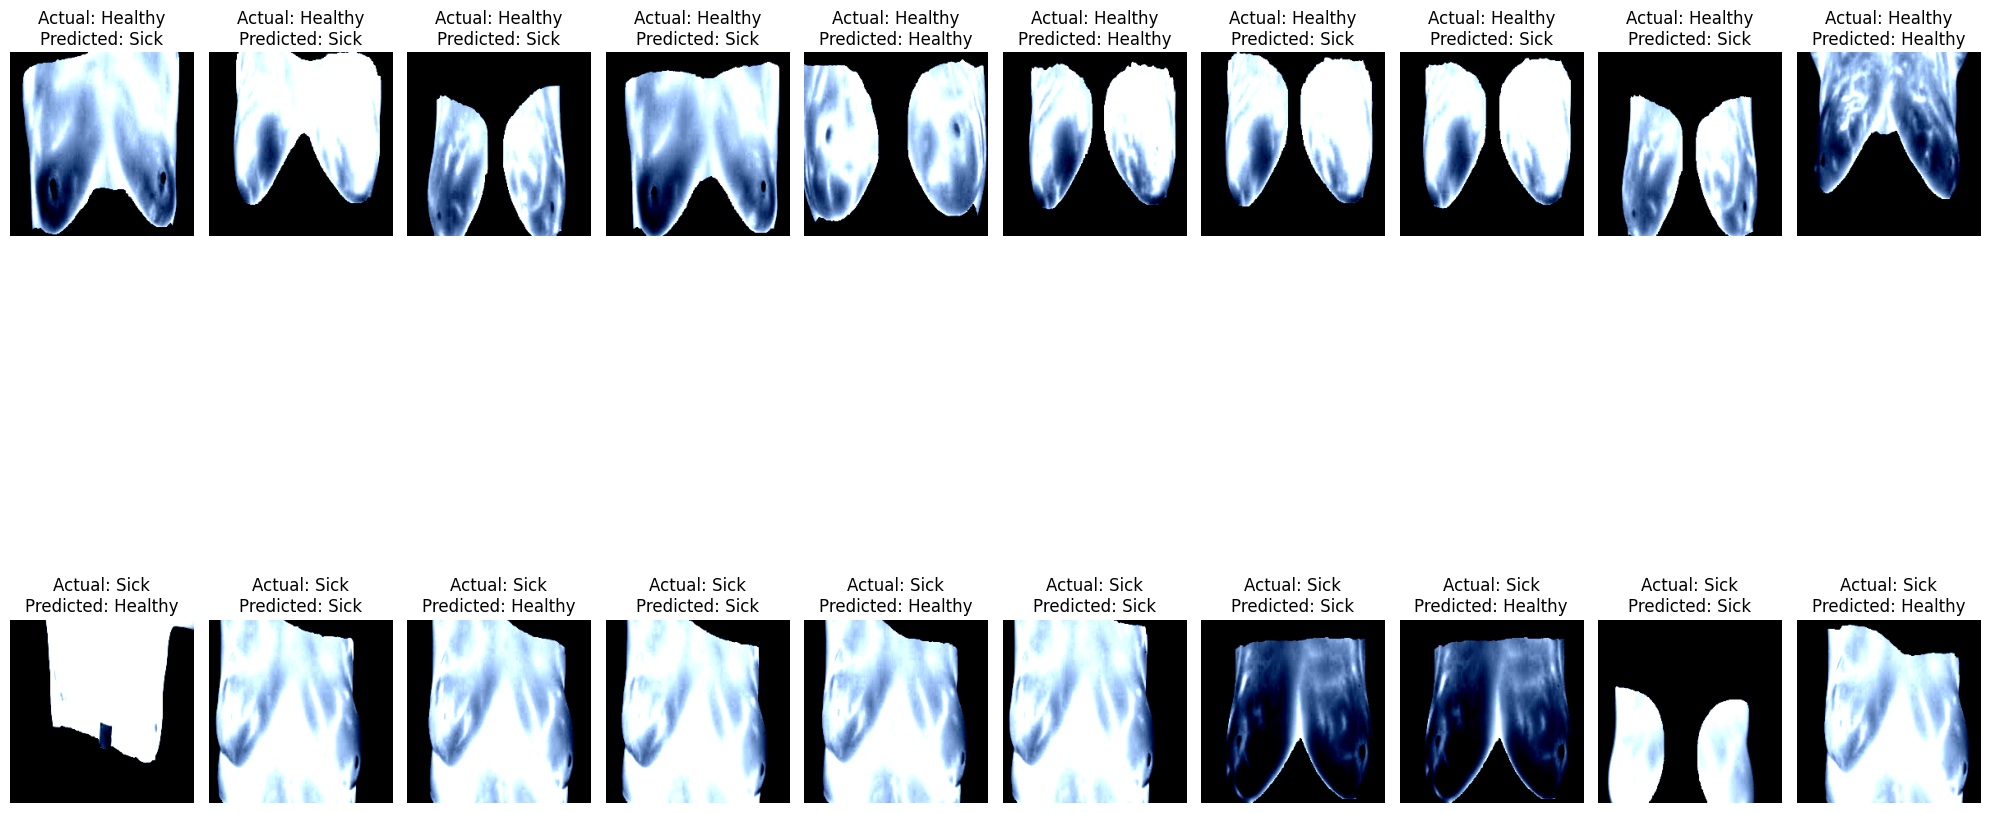

In [102]:
import random
import matplotlib.pyplot as plt
import torch

def visualize_predictions1(model, test_set, num_samples=10, class_names=None):
    # Set model to evaluation mode
    model.eval()

    # If class_names are not provided, get them from the dataset
    if class_names is None:
        class_names = test_df['label'].unique()

    # Create a figure to hold the plots
    plt.figure(figsize=(20, 15))

    # Initialize a list to keep track of samples chosen
    chosen_indices = []

    # Loop through each class
    for class_idx in range(len(class_names)):
        # Get all indices of the current class
        class_indices = [i for i, (_, label) in enumerate(test_set) if label == class_idx]

        # Randomly select num_samples indices from the class indices
        selected_indices = random.sample(class_indices, num_samples)
        chosen_indices.extend(selected_indices)

        # Loop through the selected indices and plot the images
        for i, idx in enumerate(selected_indices):
            img, label = test_set[idx]
            img = img.unsqueeze(0).to(device)  # Add batch dimension and move to device

            # Generate a random prediction
            random_pred = random.choice(range(len(class_names)))

            # Plot the image
            plt.subplot(len(class_names), num_samples, class_idx * num_samples + i + 1)
            plt.imshow(img.cpu().squeeze(0).permute(1, 2, 0))  # Convert to HWC format
            plt.title(f'Actual: {class_names[label]}\nPredicted: {class_names[random_pred]}')
            plt.axis('off')

    plt.tight_layout()
    plt.show()

# Assuming 'test_dataset' is a Subset of a larger dataset
# You can call the function like this:
visualize_predictions1(Model1, test_dataset)
